<a href="https://colab.research.google.com/github/pepetellez/BEDU-Data-Analysis/blob/main/Analisis-de-Datos-con-Python/5_Distribuciones_muestrales_y_tecnicas_de_evaluacion_de_modelos/s5_r1_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 1: Bootstrap

### 1. Objetivos:
    - Practicar la aplicación del algoritmo de boostrap
    - Practicar graficar los resultados del boostrap
 
---
    
### 2. Desarrollo:

En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible [acá](../../Datasets/Readme.md).

Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:

1. Primero saca tus estimados de locación y dispersión.
2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
3. Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
4. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
5. Grafica cada una de las listas resultantes en un histograma.
6. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Datasets/wine_quality_red-clean.csv", index_col=0)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print("Mean: ", df["alcohol"].mean())
print("Median: ", df["alcohol"].median())

Mean:  10.422983114446502
Median:  10.2


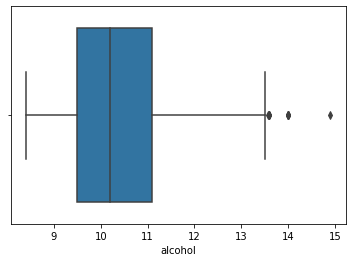

In [ ]:
sns.boxplot(x=df['alcohol'])

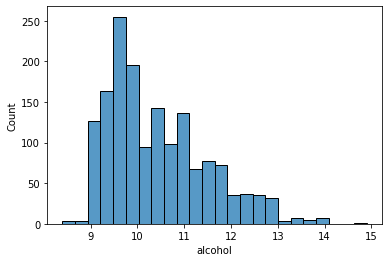

In [ ]:
sns.histplot(x=df['alcohol'])

In [ ]:
iqr = df['alcohol'].quantile(0.75) - df['alcohol'].quantile(0.25)
filtro_inferior = df['alcohol'] > df['alcohol'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['alcohol'] < df['alcohol'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

In [ ]:
print("Mean: ", df_filtrado["alcohol"].mean())
print("Median: ", df_filtrado["alcohol"].median())

Mean:  10.39241850683488
Median:  10.1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew:  0.36834335134265145
Kurtosis:  -0.00034381715533760016


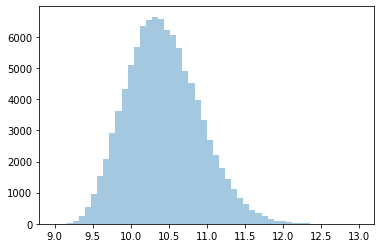

In [ ]:
#Boostrap 5 elementos
 
alcohol = df['alcohol']

means = []

for i in range(100_000):
    sample = alcohol.sample(n=5, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

sns.distplot(serie_means, kde=False, norm_hist=False);

print("Skew: ", serie_means.skew())
print("Kurtosis: ", serie_means.kurtosis())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew:  0.056393193467729
Kurtosis:  0.04121783646352073


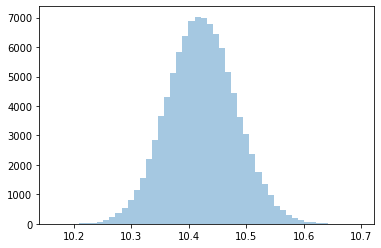

In [ ]:
#Boostrap 20% elementos

alcohol = df['alcohol']

means = []

for i in range(100_000):
    sample = alcohol.sample(frac=0.2, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

sns.distplot(serie_means, kde=False, norm_hist=False);

print("Skew: ", serie_means.skew())
print("Kurtosis: ", serie_means.kurtosis())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew:  0.0275442355886186
Kurtosis:  -0.011308344960031302


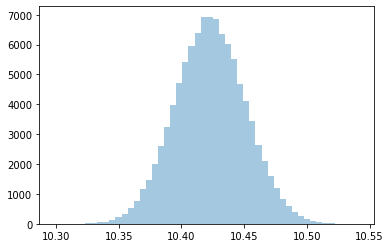

In [ ]:
#Boostrap 90% elementos

alcohol = df['alcohol']

means = []

for i in range(100_000):
    sample = alcohol.sample(frac=0.9, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

sns.distplot(serie_means, kde=False, norm_hist=False);

print("Skew: ", serie_means.skew())
print("Kurtosis: ", serie_means.kurtosis())